# Week 12 Homework (Unit 11 - Pandas)

**Assignment due date:** Midnight the night before the Week 13 Live Session. 

In this assignment you will apply what you are learning to answer questions about campaign contributions in the Democratic presidential primary race. We will use the csv file located inside the dataset "CA.zip", available online at the fec.gov website, here: http://www.fec.gov/disclosurep/PDownload.do. You will need to download then "unzip" the file and save the csv in the same folder as this notebook.

Documentation for this data file can be found here: ftp://ftp.fec.gov/FEC/Presidential_Map/2016/DATA_DICTIONARIES/CONTRIBUTOR_FORMAT.txt

Note - While we've left one code/markdown cell for you after each question as a placeholder, some of your answers will require multiple cells to fully respond.

First, let's load in the data. Note we define a custom date parser to speed up import (we could have Python guess the date format, but this can make the load a lot slower).  

We will also subset the data to look at the primary period.  Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.  We will analyze through May 2016.

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

contrib = pd.read_csv('../../P00000001-CA.csv', index_col=False, parse_dates = ['contb_receipt_dt'], date_parser=d)
# Note - for now, it is okay to ignore the warning about mixed types.  

C:\Users\cyhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(contrib.shape)
# Subset data to primary period
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(1125659, 18)
(654502, 18)


## 1. Data Exploration

**1a.** First, let's take a preliminary look at our data:
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this dataset (linked above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the "election_tp" variable contain?

In [8]:
print(contrib.shape)
print(contrib.dtypes) #use dtypes instead of columns to print not only column name but also type

(654502, 18)
cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
tran_id                      object
election_tp                  object
dtype: object


**Answer Here**
There are 654,502 rows and 18 variables in the data. Checking against the dataset documentation, I have all the columns imported. 

Based on the documentation, "election_tp" contains election type and election year in the format of EYYYY where the first letter indicates the election type.

**1b.** Print out the first 5 observations from the dataset to manually look through some of your data.

In [9]:
print(contrib.head())

     cmte_id    cand_id                  cand_nm          contbr_nm  \
0  C00575795  P00003392  Clinton, Hillary Rodham         AULL, ANNE   
1  C00575795  P00003392  Clinton, Hillary Rodham  CARROLL, MARYJEAN   
2  C00575795  P00003392  Clinton, Hillary Rodham   GANDARA, DESIREE   
3  C00577130  P60007168         Sanders, Bernard          LEE, ALAN   
4  C00577130  P60007168         Sanders, Bernard   LEONELLI, ODETTE   

     contbr_city contbr_st     contbr_zip            contbr_employer  \
0       LARKSPUR        CA 949,391,913.00                        NaN   
1        CAMBRIA        CA 934,284,638.00                        NaN   
2        FONTANA        CA 923,371,507.00                        NaN   
3      CAMARILLO        CA 930,111,214.00  AT&T GOVERNMENT SOLUTIONS   
4  REDONDO BEACH        CA 902,784,310.00   VERICOR ENTERPRISES INC.   

   contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc memo_cd  \
0            RETIRED              50.00       2016-04-26   

**1c.** When working with a new dataset, it is important to explore and sanity check your variables. Pick three variables from the dataset above and run some quick sanity checks. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use markdown cells to explain if your sanity checks "pass" your scrutiny or if you have concerns about the integrity of your data. 

In [23]:
print('Date Range: ',contrib['contb_receipt_dt'].min(),', ',contrib['contb_receipt_dt'].max())
print(contrib['cand_nm'].value_counts())
print('Contribution Amount Range: ',contrib['contb_receipt_amt'].min(),', ',contrib['contb_receipt_amt'].max())

Date Range:  2013-11-05 00:00:00 ,  2016-05-31 00:00:00
Sanders, Bernard             371795
Clinton, Hillary Rodham      163509
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: cand_nm, dtype: int64
Contribution Amount Range:  -10000.0 ,  10800.0


**Answer Here** (Create more cells as needed)
1. Check the date range of the data as we imported data through May. Passed.
2. Count the frequency of contributions by candidates. As a foreigner, I'm not very familiar with U.S. politics, I would see the check is also passed.
3. Exam the contribution amount range and detect negative amounts which need further investigation. These may be are refunds.

In [6]:
# further investigate negative contribution amount by receipt description
nega = contrib[contrib['contb_receipt_amt']<0]
nega.groupby('receipt_desc').count()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
receipt_desc,,,,,,,,,,,,,,,,,
* REATTRIBUTED FROM KIM RIDDER,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
* REATTRIBUTED TO AISHA LYNCH,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
* REATTRIBUTED TO CAROL FITZMORRIS,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
* REATTRIBUTED TO CHRISTINE MARSHALL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
* REATTRIBUTED TO ELIZABETH DOYLE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
* REATTRIBUTED TO ERIC UHRANE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
* REATTRIBUTED TO FRANK DARABONT,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
* REATTRIBUTED TO JESSIKA CROIZAT,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
* REATTRIBUTED TO JOHN CASTOR,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## 2. Exploring Campaign Contributions

Let's investigate the donations to our candidates.

**2a.** 
Create a table that shows the total number of donations to each candidate. Hint: use "groupby" as shown in async unit 11.07.

When presenting data in a table, it is best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to get insights out of your tables. Use "sort_values" to sort the data so that candidates with the largest number of donations appear on top. From now on, all tables you present in this assignment (and course) should be sorted.

What candidate recieved the largest number of contributions (variable 'contb_receipt_amt')?

In [4]:
cand_num = contrib.groupby('cand_nm').count()
cand_num.sort_values(by='contb_receipt_amt', ascending = False)

,cmte_id,cand_id,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
cand_nm,,,,,,,,,,,,,,,,,
"Sanders, Bernard",371795,371795,371795,371795,371795,371795,367685,369356,371795,371795,2667,65,353884,371795,371795,371795,371794
"Clinton, Hillary Rodham",163509,163509,163509,163508,163509,163506,121307,161746,163509,163509,1615,19985,20632,163509,163509,163509,163509
"Cruz, Rafael Edward 'Ted'",57136,57136,57136,57136,57136,57136,56887,57053,57136,57136,3375,2755,4531,57136,57136,57136,57099
"Carson, Benjamin S.",27342,27342,27342,27342,27342,27342,27051,27161,27342,27342,737,579,695,27342,27342,27342,27286
"Rubio, Marco",14089,14089,14089,14089,14089,14089,13627,13643,14089,14089,1544,1080,1318,14089,14089,14089,14089
"Fiorina, Carly",4696,4696,4696,4696,4696,4695,4666,4671,4696,4696,116,76,121,4696,4696,4696,4687
"Paul, Rand",4256,4256,4256,4256,4256,4256,4159,4165,4256,4256,16,235,0,4256,4256,4256,4256
"Bush, Jeb",3114,3114,3114,3114,3114,3114,3070,3070,3114,3114,243,186,248,3114,3114,3114,3114
"Kasich, John R.",2988,2988,2988,2988,2988,2988,2959,2961,2988,2988,11,2,0,2988,2988,2988,2988


**Answer Here**

Clinton, Hillary Rodham received the largest number of contributions, 547,211 in total.

**2b.** Now, create a table that shows the total **value** of donations to each candidate. What candidate raised the most money in California?

In [5]:
# first check whether all donations are in CA
print(contrib.contbr_st.unique())
cand_amt = contrib.groupby('cand_nm').sum()
print(cand_amt.sort_values(by='contb_receipt_amt', ascending = False))

['CA']
                           contb_receipt_amt      file_num
cand_nm                                                   
Clinton, Hillary Rodham        39,368,777.01  177371075706
Sanders, Bernard               18,773,871.31  401239458307
Cruz, Rafael Edward 'Ted'       6,286,460.34   61194820307
Rubio, Marco                    4,846,483.72   14820269283
Bush, Jeb                       3,325,536.83    3293489176
Carson, Benjamin S.             2,952,109.00   28789589416
Kasich, John R.                 1,553,823.54    3184411092
Fiorina, Carly                  1,468,489.42    4891963488
Trump, Donald J.                  893,356.89    2414085037
Paul, Rand                        797,624.29    4502176485
Walker, Scott                     495,006.90     754234274
Christie, Christopher J.          456,066.00     351153416
Graham, Lindsey O.                408,595.00     352955767
O'Malley, Martin Joseph           297,834.26     411809332
Huckabee, Mike                    230,890.60     

**Answer Here**

Clinton, Hillary Rodham raised the most money in California, $83,781,357.32   in total.

**2c.** Combining your tables
- What is the "type" of the two tables you printed above? Show if they are Series, or DataFrames.
- Convert any Series to pandas DataFrames.
- Update the variable (column) names to accurately describe what is shown
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table. Use the "join" function.


In [42]:
# both are dataframes
print(type(cand_num))
print(type(cand_amt))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
# update column names
cand_amt.pop('file_num') #remove file_num from cand_amt table as sum of file_num is meaningless.
cand_amt.columns =['total_contb_amt']
col2 = list(map(lambda x: x + '_count', list(cand_num.columns)))
cand_num.columns = col2
cand_num_amt = cand_num.join(cand_amt)
cand_num_amt.sort_values(by = 'total_contb_amt', ascending = False)


,cmte_id_count,cand_id_count,contbr_nm_count,contbr_city_count,contbr_st_count,contbr_zip_count,contbr_employer_count,contbr_occupation_count,contb_receipt_amt_count,contb_receipt_dt_count,receipt_desc_count,memo_cd_count,memo_text_count,form_tp_count,file_num_count,tran_id_count,election_tp_count,total_contb_amt
cand_nm,,,,,,,,,,,,,,,,,,
"Clinton, Hillary Rodham",163509,163509,163509,163508,163509,163506,121307,161746,163509,163509,1615,19985,20632,163509,163509,163509,163509,"39,368,777.01"
"Sanders, Bernard",371795,371795,371795,371795,371795,371795,367685,369356,371795,371795,2667,65,353884,371795,371795,371795,371794,"18,773,871.31"
"Cruz, Rafael Edward 'Ted'",57136,57136,57136,57136,57136,57136,56887,57053,57136,57136,3375,2755,4531,57136,57136,57136,57099,"6,286,460.34"
"Rubio, Marco",14089,14089,14089,14089,14089,14089,13627,13643,14089,14089,1544,1080,1318,14089,14089,14089,14089,"4,846,483.72"
"Bush, Jeb",3114,3114,3114,3114,3114,3114,3070,3070,3114,3114,243,186,248,3114,3114,3114,3114,"3,325,536.83"
"Carson, Benjamin S.",27342,27342,27342,27342,27342,27342,27051,27161,27342,27342,737,579,695,27342,27342,27342,27286,"2,952,109.00"
"Kasich, John R.",2988,2988,2988,2988,2988,2988,2959,2961,2988,2988,11,2,0,2988,2988,2988,2988,"1,553,823.54"
"Fiorina, Carly",4696,4696,4696,4696,4696,4695,4666,4671,4696,4696,116,76,121,4696,4696,4696,4687,"1,468,489.42"
"Trump, Donald J.",2255,2255,2255,2255,2255,2255,2252,2247,2255,2255,3,485,0,2255,2255,2255,2254,"893,356.89"


**2d.** Calculate and add a new variable to your table that shows the average $ per donation.

In [7]:
cand_num_amt['avg_contb_amt'] = cand_num_amt['total_contb_amt']/cand_num_amt['contb_receipt_amt_count']
cand_num_amt.sort_values(by = 'total_contb_amt', ascending = False)

,cmte_id_count,cand_id_count,contbr_nm_count,contbr_city_count,contbr_st_count,contbr_zip_count,contbr_employer_count,contbr_occupation_count,contb_receipt_amt_count,contb_receipt_dt_count,receipt_desc_count,memo_cd_count,memo_text_count,form_tp_count,file_num_count,tran_id_count,election_tp_count,total_contb_amt,avg_contb_amt
cand_nm,,,,,,,,,,,,,,,,,,,
"Clinton, Hillary Rodham",163509,163509,163509,163508,163509,163506,121307,161746,163509,163509,1615,19985,20632,163509,163509,163509,163509,"39,368,777.01",240.77
"Sanders, Bernard",371795,371795,371795,371795,371795,371795,367685,369356,371795,371795,2667,65,353884,371795,371795,371795,371794,"18,773,871.31",50.50
"Cruz, Rafael Edward 'Ted'",57136,57136,57136,57136,57136,57136,56887,57053,57136,57136,3375,2755,4531,57136,57136,57136,57099,"6,286,460.34",110.03
"Rubio, Marco",14089,14089,14089,14089,14089,14089,13627,13643,14089,14089,1544,1080,1318,14089,14089,14089,14089,"4,846,483.72",343.99
"Bush, Jeb",3114,3114,3114,3114,3114,3114,3070,3070,3114,3114,243,186,248,3114,3114,3114,3114,"3,325,536.83","1,067.93"
"Carson, Benjamin S.",27342,27342,27342,27342,27342,27342,27051,27161,27342,27342,737,579,695,27342,27342,27342,27286,"2,952,109.00",107.97
"Kasich, John R.",2988,2988,2988,2988,2988,2988,2959,2961,2988,2988,11,2,0,2988,2988,2988,2988,"1,553,823.54",520.02
"Fiorina, Carly",4696,4696,4696,4696,4696,4695,4666,4671,4696,4696,116,76,121,4696,4696,4696,4687,"1,468,489.42",312.71
"Trump, Donald J.",2255,2255,2255,2255,2255,2255,2252,2247,2255,2255,3,485,0,2255,2255,2255,2254,"893,356.89",396.17


**2e.** There are several interesting conclusions you can draw from the table you have created. Please comment on the results of your data analysis in a short paragraph. What have you learned about campaign contributions in California?

**Answer Here**
Clinton, Hillary Rodham ranks 1st for both total number of contributions and total amounts. However, the avarage donation amount is quite low. This may indicate that she got support by many common people.

Even though candidate Gilmore, James S III has the highest average donation amount, the total amount is the lowest and thus the impact is small.

Among the top 10 candidates (ranked by total contribution amount), Bush, Jeb has the highest average amount which is much higher than other candidates. It may indicate that he got more support from richer people.

## 3. Exploring Doner Occupation

We saw in part 2 that some simple data analysis can give us insights into the campaign of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the "contbr_occupation" variable.

**3a.** Subset your data to create a data frame with only donations for Hillary Clinton. Then, use "value_counts()" and "head()" to display the top 5 occupations (contbr_occupation) for her donors. Note: we are just interested in the count of donations, not the value of those donations.

In [15]:
clinton = contrib[contrib['cand_nm']=='Clinton, Hillary Rodham']
clinton.contbr_occupation.value_counts().head()

RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64

**3b.** Time to unlock the power of Python! Even though we are doing data analysis, we can still create functions. Copy/paste your code above, but turn it into a function that that can be run for any candidate (not just Hillary Clinton).

In [16]:
def occupation(cand_nm):
    cand = contrib[contrib['cand_nm']== cand_nm]
    return cand.contbr_occupation.value_counts().head()

**3c.** Run your function on three candidates:
    1. Hillary Clinton
    2. Bernie Sanders
    3. Donald Trump

In [27]:
print("Top 5 occupations for Hillary Clinton:\n",occupation('Clinton, Hillary Rodham'))
print()
print("Top 5 occupations for Bernie Sanders:\n", occupation('Sanders, Bernard'))
print()
print("Top 5 occupations for Donald Trump:\n", occupation('Trump, Donald J.'))

Top 5 occupations for Hillary Clinton:
 RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64

Top 5 occupations for Bernie Sanders:
 NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: contbr_occupation, dtype: int64

Top 5 occupations for Donald Trump:
 RETIRED                  849
INFORMATION REQUESTED     70
CEO                       57
OWNER                     51
PRESIDENT                 35
Name: contbr_occupation, dtype: int64


**3d.** Comment on your findings in a short paragraph.

**Answer Here**

Top 5 occupations of contributors are quite different for above three candidates. Most of Hillary Clinton's donations are from the retired, more support from the senior. However, top 1 occupation for Bernie Sanders' is not employed which may indicate that Bernie Sanders' policies or ideas would benefit the poorer people. Next, Donald Trump got some donations from the high-class of the society. In all, these candidates got support from different classes of the society as their policies would benefit different groups.

**3e.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. Do you have any new insights into the results you got in section 2, now that you see the top occupations for each candidate?

**Answer Here**

As Donald Trump may represent benefits of a smaller group but rich people, he didn't get many donations in both the number of donations and the amounts. On the opposite, Hillary Clinton got support from various groups of people, especially the retired, so she got the most contributions. It also makes sense that Bernie Sanders has the lowest average amount of donation as he got most support from the employed.

## 4. Plotting Data

There is an important element that we have not yet explored in this dataset - time.

**4a.** Please create a single line chart with the following elements:
- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

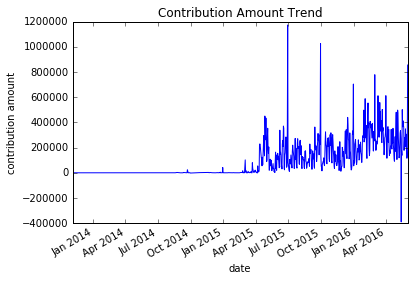

In [41]:
contrib_time = contrib.groupby('contb_receipt_dt').sum()
contrib_time['contb_receipt_amt'].plot()
plt.xlabel("date")
plt.ylabel("contribution amount")
plt.title("Contribution Amount Trend")

**4b.** This chart is messy (and you should make better plots for your project). While there are better ways we can show this data, what conclusions can you draw from just your basic plot?

**Answer Here**

Before Apr 2015, there were few donations in California. Then the total amounts are trending up and down after Apr 2016.

**4c.** Brainstorm: If you were going to improve on this plot looking at donations over time, what could you display that would be more useful? You do not need to do any plotting for this question.

**Answer Here**
1. Make the plot bigger so that it's more readable.
2. analyze it by day of the week, month
3. plot the month-over-month change
4. compare trends by several candidates

We hope you enjoyed this assignment! If you have any comments for us, please leave them in your notebook below.